In [1]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
def work_tsne(df_data, segmentation, plot_name=''):
    df_data = df_data[df_data.columns.drop(list(df_data.filter(regex='Unnamed')))]
#     df_data = df_data.dropna()
    # Run TSNE
    tsne_em = TSNE(n_components=2, perplexity=25, n_iter=1000, verbose=1).fit_transform(df_data)
#     print(tsne_em)
    df = pd.DataFrame()
    df["y"] = segmentation
    uniqueValues = segmentation.nunique()
    
    df["comp_1"] = tsne_em[:,0]
    df["comp_2"] = tsne_em[:,1]
#     print(df.loc[df['y'] == 5])
#     print(df)
    sns.scatterplot(x="comp_1", y="comp_2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", uniqueValues),
                data=df).set(title=plot_name)
    return df

In [3]:
import random
def get_example_from_tsne(dataset,result_data,comp_1_min,comp_1_max,comp_2_min,comp_2_max):
    example = result_data[(result_data["y"]==5) &(result_data["comp_1"]>-2) & (result_data["comp_1"]<5)& (result_data["comp_2"]>-40) & (result_data["comp_2"]<-25)]

    pos_of_example = example.iloc[random.randint(0, len(example))].name
#     dataset.iloc[pos_of_example]
    return dataset.iloc[pos_of_example]['full_path'].replace(r'/content/drive/MyDrive',r'C:\Users\oguzkagan\Desktop\coding\other\cse\grad_project')
#     return example[random.randint(0, len(example))]
    

In [4]:
base_path = r"C:\Users\Aziz\Desktop\Github\CSV"

In [5]:
# ARC INFORMATION - don't touch
arc_dataset_path = base_path+"\dataset_info_by_date_arc.csv"
arc_dataset = pd.read_csv(arc_dataset_path)
segmentation_path_arc = base_path+"\like_rate_segmentation_by_date_arc.csv"
df_rate = pd.read_csv(segmentation_path_arc)
segmentation_arc = df_rate['like_rate_segmentation']

In [6]:
# ART INFORMATION - don't touch
art_dataset_path = base_path+"\dataset_info_by_date_art.csv"
art_dataset = pd.read_csv(arc_dataset_path)
segmentation_path_arc = base_path+"\like_rate_segmentation_by_date_art.csv"
df_rate = pd.read_csv(segmentation_path_arc)
segmentation_art = df_rate['like_rate_segmentation']

### calculations:

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 807 samples in 0.002s...
[t-SNE] Computed neighbors for 807 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 807 / 807
[t-SNE] Mean sigma: 53.704448
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.985458
[t-SNE] KL divergence after 1000 iterations: 0.505529


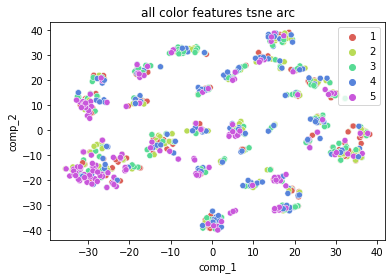

In [7]:
# for color_features arc
color_features_arc = base_path+"\color_palette_and_hue_contrast_arc.csv"
df_color_features = pd.read_csv(color_features_arc)
result_data = work_tsne(df_color_features,segmentation_arc,plot_name='all color features tsne arc')


In [8]:
# for color_features arc
#comp_1_min = -2
#comp_1_max = 5
#comp_2_min = -40
#comp_2_min = -25
#example_path = get_example_from_tsne(arc_dataset,result_data,comp_1_min,comp_1_max,comp_2_min,comp_2_min)
#plt.figure(figsize=(20,10))
#image = mpimg.imread(example_path)
#plt.imshow(image)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 807 samples in 0.001s...
[t-SNE] Computed neighbors for 807 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 807 / 807
[t-SNE] Mean sigma: 14.589976
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.511894
[t-SNE] KL divergence after 1000 iterations: 0.473178


,y,comp_1,comp_2
0,1,-43.268490,-7.967953
1,1,17.212378,30.090738
2,1,12.911886,29.967279
3,1,-27.929602,-6.460273
4,1,-40.553085,-6.797115
...,...,...,...
802,5,-8.356414,0.854369
803,5,13.800571,13.890682
804,5,-34.899849,-16.432758
805,5,-43.451374,-7.231150


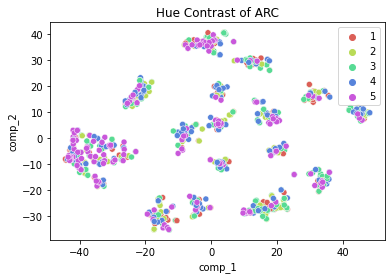

In [9]:
# for color_features arc => only dominant colors
color_features_arc = base_path+"\color_palette_and_hue_contrast_arc.csv"
df_color_features = pd.read_csv(color_features_arc)
df_color_features = df_color_features.drop(['dominant_hue_1','dominant_sat_1','dominant_val_1','dominant_hue_2','dominant_sat_2','dominant_val_2','dominant_hue_3','dominant_sat_3','dominant_val_3','like_rate_segmentation'], axis=1)
work_tsne(df_color_features,segmentation_arc,plot_name='Hue Contrast of ARC')

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 807 samples in 0.001s...
[t-SNE] Computed neighbors for 807 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 807 / 807
[t-SNE] Mean sigma: 23.826954
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.434059
[t-SNE] KL divergence after 1000 iterations: 0.565784


,y,comp_1,comp_2
0,1,8.955394,47.871796
1,1,30.321108,-27.676779
2,1,23.510983,-17.836613
3,1,-13.003738,-4.156580
4,1,-11.794935,0.995517
...,...,...,...
802,5,20.899942,2.786210
803,5,-17.862516,13.393250
804,5,-16.995613,-2.843650
805,5,0.278967,4.899042


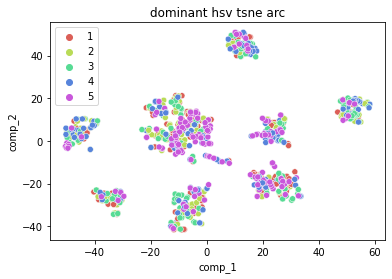

In [10]:
# for color_features arc => only dominant colors
color_features_arc = base_path+"\color_palette_and_hue_contrast_arc.csv"
df_color_features = pd.read_csv(color_features_arc)
df_color_features = df_color_features.drop(['hue_contrast_c1_c2','hue_contrast_c1_c3','hue_contrast_c1_c4','hue_contrast_c1_c5','hue_contrast_c2_c3','hue_contrast_c2_c4','hue_contrast_c2_c5','hue_contrast_c3_c4','hue_contrast_c3_c5','hue_contrast_c4_c5','like_rate_segmentation'], axis=1)
work_tsne(df_color_features,segmentation_arc,plot_name='dominant hsv tsne arc')


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 807 samples in 0.002s...
[t-SNE] Computed neighbors for 807 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 807 / 807
[t-SNE] Mean sigma: 0.008995
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.785973
[t-SNE] KL divergence after 1000 iterations: 0.360269


,y,comp_1,comp_2
0,1,-12.312364,38.744083
1,1,11.460735,-5.712357
2,1,7.252535,-9.044341
3,1,-1.108827,47.245846
4,1,-24.582434,35.773857
...,...,...,...
802,5,-25.686153,23.309452
803,5,-24.028227,3.547894
804,5,3.087122,-54.787407
805,5,-3.701530,-6.086341


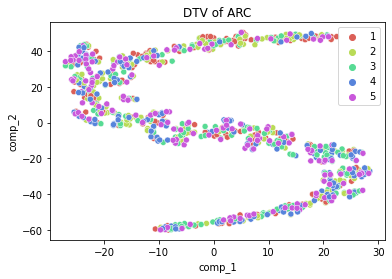

In [11]:
dtv_feature_arc = base_path+"\Dtvarc_ters_normal_updated.csv"
df_dtv_arc = pd.read_csv(dtv_feature_arc)
work_tsne(df_dtv_arc,segmentation_arc,plot_name='DTV of ARC')

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 807 samples in 0.015s...
[t-SNE] Computed neighbors for 807 samples in 0.145s...
[t-SNE] Computed conditional probabilities for sample 807 / 807
[t-SNE] Mean sigma: 34446.443067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.870888
[t-SNE] KL divergence after 1000 iterations: 0.337559


,y,comp_1,comp_2
0,1,29.444366,-3.427942
1,1,-1.959343,-16.189291
2,1,-54.152344,14.477918
3,1,32.773968,20.585968
4,1,-26.047138,19.103653
...,...,...,...
802,5,-7.341287,-24.835691
803,5,-51.358036,13.138060
804,5,28.645342,-3.096212
805,5,32.000156,19.363956


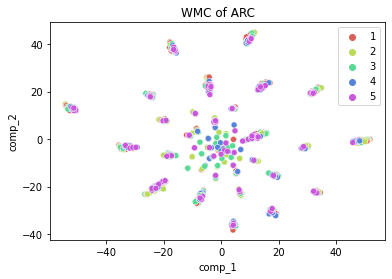

In [12]:
wmc_feature_arc = base_path+"\Wmc_ARC_Ters.csv"
df_wmc_arc = pd.read_csv(wmc_feature_arc)
work_tsne(df_wmc_arc,segmentation_arc,plot_name='WMC of ARC')

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 784 samples in 0.001s...
[t-SNE] Computed neighbors for 784 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 784 / 784
[t-SNE] Mean sigma: 0.015501
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.127571
[t-SNE] KL divergence after 1000 iterations: 0.257781


,y,comp_1,comp_2
0,2,8.597865,5.745497
1,2,-29.153370,14.606314
2,2,-16.411587,27.745050
3,3,-9.958151,30.059029
4,3,-22.212746,23.507481
...,...,...,...
779,1,5.821116,-1.809285
780,1,4.196706,31.562185
781,1,-2.061954,32.534851
782,1,7.223950,25.529408


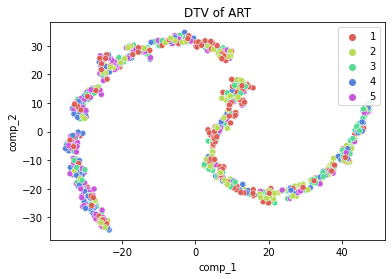

In [13]:
dtv_feature_art = base_path+"\Dtvart_ters_normal_updated.csv"
df_dtv_art = pd.read_csv(dtv_feature_art)
work_tsne(df_dtv_art,segmentation_art,plot_name='DTV of ART')

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 784 samples in 0.014s...
[t-SNE] Computed neighbors for 784 samples in 0.134s...
[t-SNE] Computed conditional probabilities for sample 784 / 784
[t-SNE] Mean sigma: 52952.867193
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.015755
[t-SNE] KL divergence after 1000 iterations: 0.408342


,y,comp_1,comp_2
0,2,24.641119,-0.297778
1,2,-44.723965,17.211098
2,2,16.985861,20.982567
3,3,-5.748230,23.394724
4,3,37.621113,-10.669664
...,...,...,...
779,1,-22.661505,2.377872
780,1,-9.090995,-31.419840
781,1,7.102988,-12.648311
782,1,8.599724,33.934261


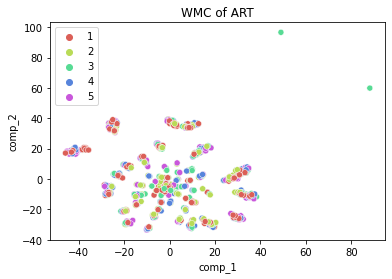

In [14]:
wmc_feature_art = base_path+"\Wmc_ART_Ters.csv"
df_wmc_art = pd.read_csv(wmc_feature_art)
work_tsne(df_wmc_art,segmentation_art,plot_name='WMC of ART')

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 784 samples in 0.002s...
[t-SNE] Computed neighbors for 784 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 784 / 784
[t-SNE] Mean sigma: 46.415258
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.057091
[t-SNE] KL divergence after 1000 iterations: 0.612884


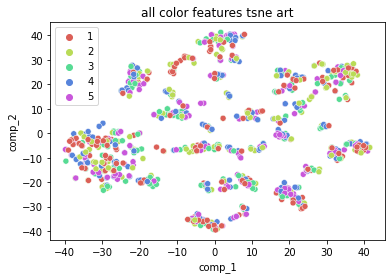

In [15]:
# for color_features art
color_features_art = base_path+"\color_palette_and_hue_contrast_art.csv"
df_color_features = pd.read_csv(color_features_art)

df_color_features = df_color_features.iloc[: , 1:]
result_data = work_tsne(df_color_features,segmentation_art,plot_name='all color features tsne art')


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 784 samples in 0.001s...
[t-SNE] Computed neighbors for 784 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 784 / 784
[t-SNE] Mean sigma: 18.173107
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.639221
[t-SNE] KL divergence after 1000 iterations: 0.553104


,y,comp_1,comp_2
0,2,32.467815,-23.514521
1,2,-6.807133,13.936443
2,2,16.211100,9.411926
3,3,13.387801,9.345362
4,3,-30.087042,9.155448
...,...,...,...
779,1,8.466197,-8.991647
780,1,2.919647,24.130390
781,1,-24.716415,21.761086
782,1,20.570189,-20.473581


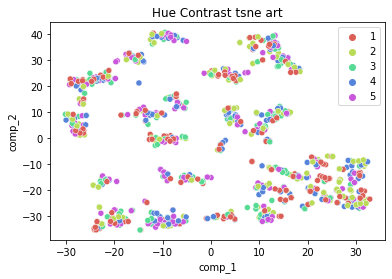

In [16]:
# for color_features arc => only dominant colors
color_features_art = base_path+"\color_palette_and_hue_contrast_art.csv"
df_color_features = pd.read_csv(color_features_art)
df_color_features = df_color_features.iloc[: , 1:]
df_color_features = df_color_features.drop(['dominant_hue_1','dominant_sat_1','dominant_val_1','dominant_hue_2','dominant_sat_2','dominant_val_2','dominant_hue_3','dominant_sat_3','dominant_val_3','like_rate_segmentation'], axis=1)
work_tsne(df_color_features,segmentation_art,plot_name='Hue Contrast tsne art')

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 784 samples in 0.001s...
[t-SNE] Computed neighbors for 784 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 784 / 784
[t-SNE] Mean sigma: 26.678200
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.280006
[t-SNE] KL divergence after 1000 iterations: 0.601583


,y,comp_1,comp_2
0,2,-31.410439,12.097329
1,2,-29.042412,15.910784
2,2,-36.526688,19.067171
3,3,48.739948,-11.270423
4,3,0.544410,-29.495016
...,...,...,...
779,1,44.961369,-4.847012
780,1,8.276175,-44.272011
781,1,-37.582851,20.434744
782,1,37.177536,-4.828309


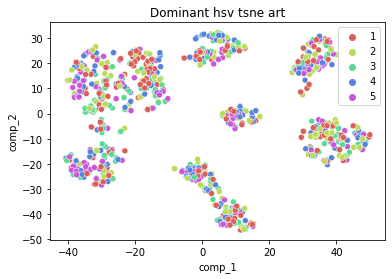

In [17]:
# for color_features arc => only dominant colors
color_features_art = base_path+"\color_palette_and_hue_contrast_art.csv"
df_color_features = pd.read_csv(color_features_art)
df_color_features = df_color_features.iloc[: , 1:]
df_color_features = df_color_features.drop(['hue_contrast_c1_c2','hue_contrast_c1_c3','hue_contrast_c1_c4','hue_contrast_c1_c5','hue_contrast_c2_c3','hue_contrast_c2_c4','hue_contrast_c2_c5','hue_contrast_c3_c4','hue_contrast_c3_c5','hue_contrast_c4_c5','like_rate_segmentation'], axis=1)
work_tsne(df_color_features,segmentation_art,plot_name='Dominant hsv tsne art')


In [ ]:
# for color_features arc => only dominant colors
color_features_art =r"C:\Users\Aziz\Desktop\GraduationProject-main\CSV\laplacian_ARC_pca.csv"
df_color_features = pd.read_csv(color_features_art)
df_color_features = df_color_features.drop(['Unnamed: 0'], axis=1)
work_tsne(df_color_features,segmentation_arc,plot_name='Edge Distribution of ARC TSNE')

In [ ]:
# for color_features arc => only dominant colors
color_features_art =r"C:\Users\Aziz\Desktop\GraduationProject-main\CSV\laplacian_ART_pca.csv"
df_color_features = pd.read_csv(color_features_art)
df_color_features = df_color_features.drop(['Unnamed: 0'], axis=1)
work_tsne(df_color_features,segmentation_art,plot_name='Edge Distribution of ART TSNE')